GRADIENT FIELD VISUALIZATION

1. Basic 2D Gradient Field with Contours...


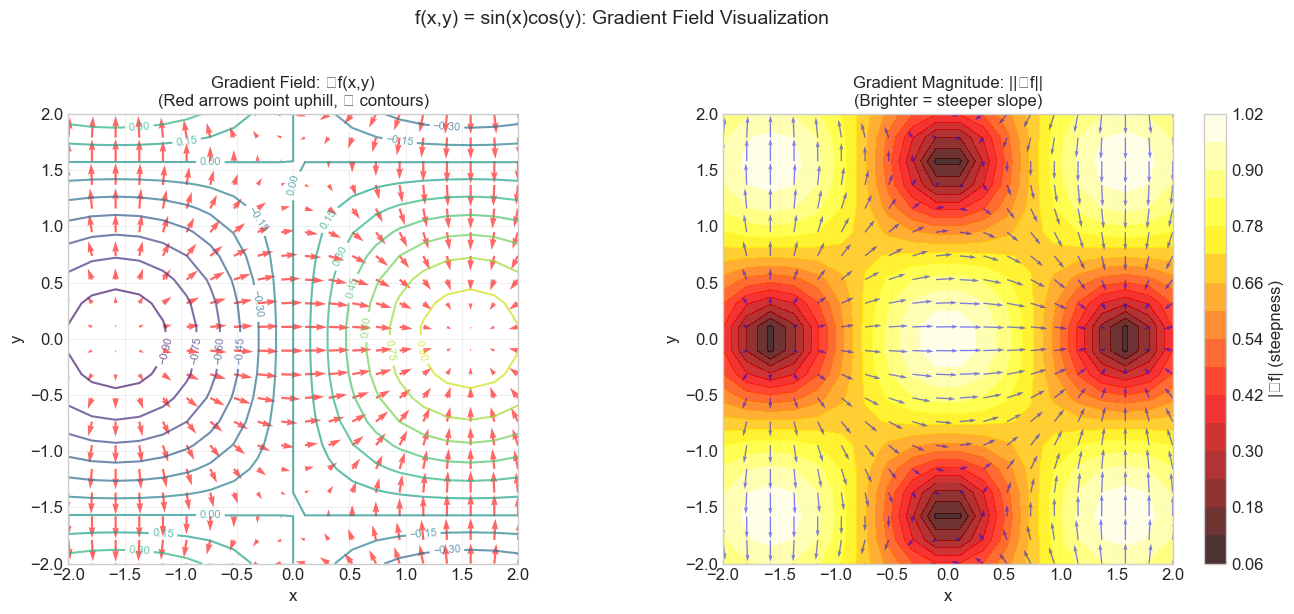


2. 3D Surface with Gradient Projection...


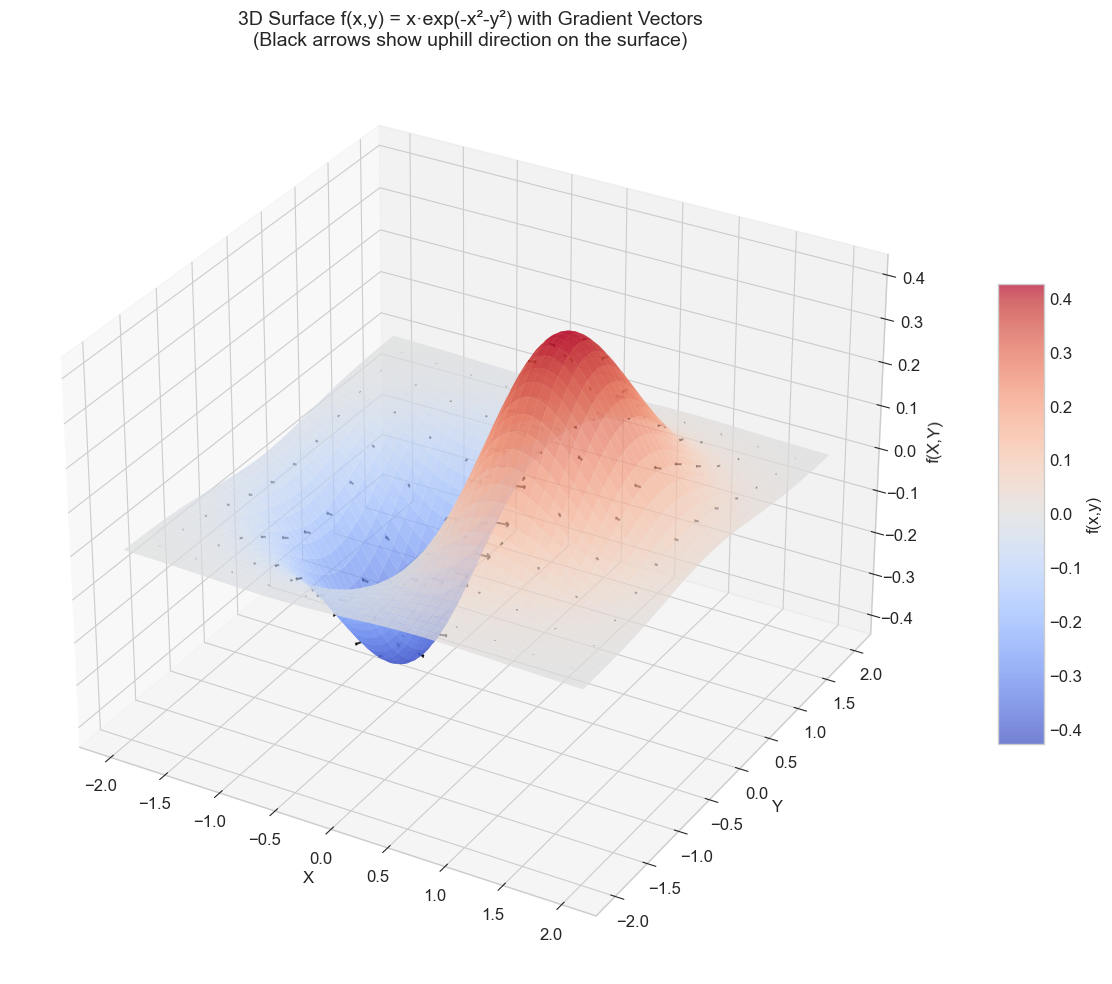


3. Gradient Descent Path Visualization...


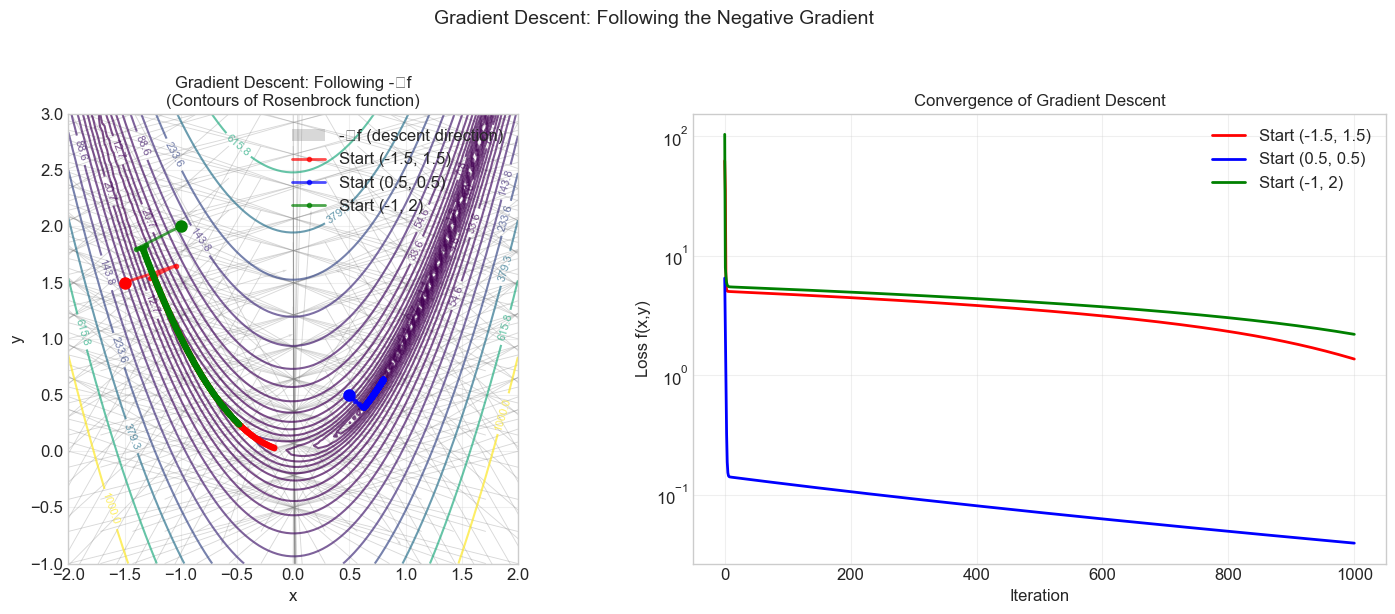


4. Comparison of ∇f vs -∇f...


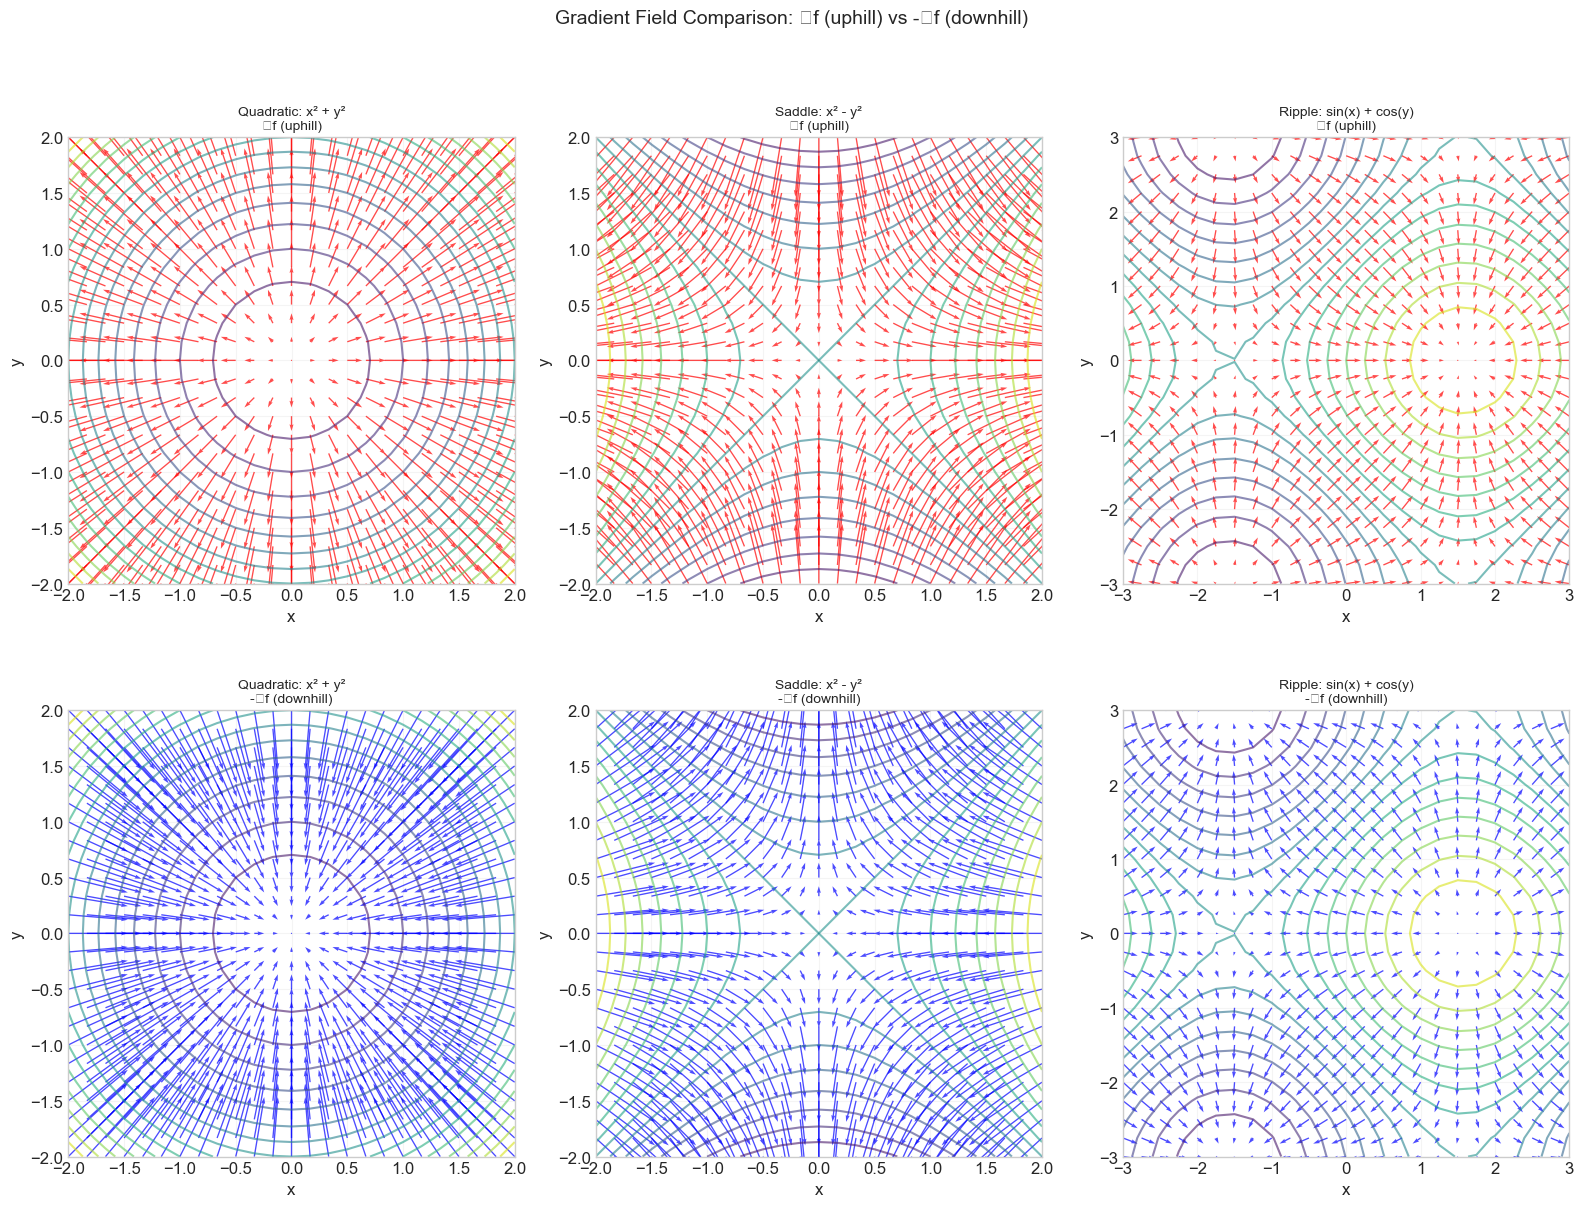


5. Gradient Orthogonality Demonstration...


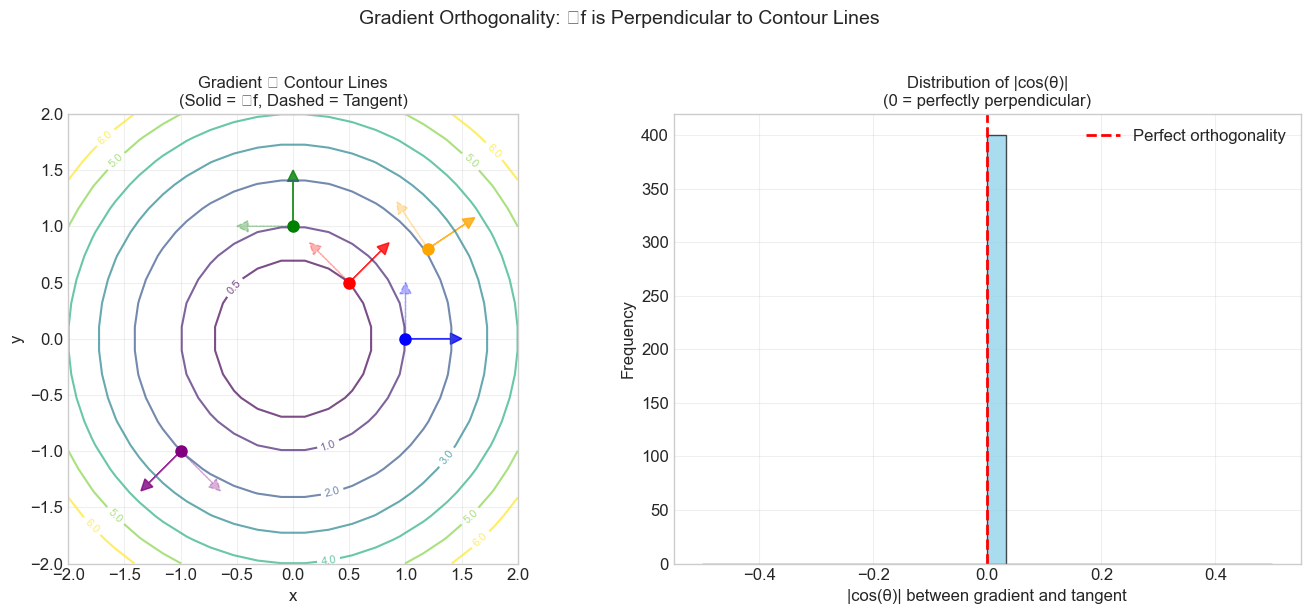


6. Gradient Descent Step-by-Step...


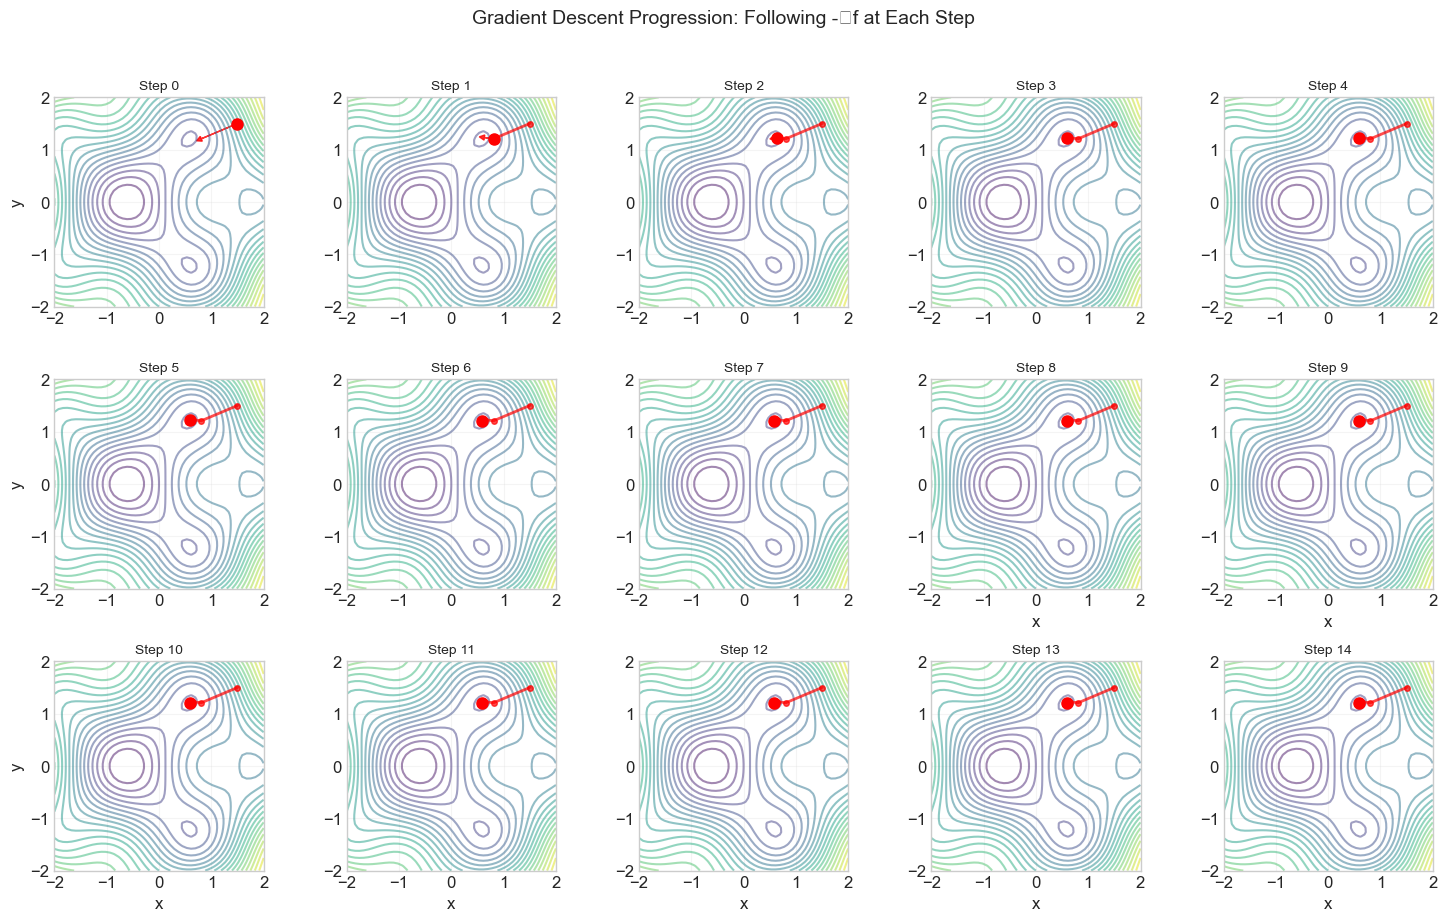


Visualization Complete!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# ============================================================================
# PART 1: BASIC GRADIENT FIELD VISUALIZATION IN 2D
# ============================================================================

def basic_gradient_field():
    """Illustrate gradient field with contours and quiver plot"""
    
    # Define a simple 2D function: f(x,y) = sin(x) * cos(y)
    def f(x, y):
        return np.sin(x) * np.cos(y)
    
    # Analytical gradient
    def grad_f(x, y):
        df_dx = np.cos(x) * np.cos(y)
        df_dy = -np.sin(x) * np.sin(y)
        return df_dx, df_dy
    
    # Create grid
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)
    
    # Compute function values and gradient
    Z = f(X, Y)
    U, V = grad_f(X, Y)
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Gradient vectors on contour plot
    ax1 = axes[0]
    contour = ax1.contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.7)
    ax1.clabel(contour, inline=True, fontsize=8)
    ax1.quiver(X, Y, U, V, color='red', alpha=0.6, scale=20, width=0.005)
    ax1.set_title('Gradient Field: ∇f(x,y)\n(Red arrows point uphill, ⊥ contours)', fontsize=12)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Gradient magnitude (steepness)
    ax2 = axes[1]
    magnitude = np.sqrt(U**2 + V**2)
    im = ax2.contourf(X, Y, magnitude, levels=15, cmap='hot', alpha=0.8)
    plt.colorbar(im, ax=ax2, label='|∇f| (steepness)')
    ax2.quiver(X, Y, U, V, color='blue', alpha=0.5, scale=20, width=0.003)
    ax2.set_title('Gradient Magnitude: ||∇f||\n(Brighter = steeper slope)', fontsize=12)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle('f(x,y) = sin(x)cos(y): Gradient Field Visualization', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# PART 2: 3D SURFACE WITH GRADIENT PROJECTION
# ============================================================================

def surface_with_gradient_3d():
    """3D surface plot with gradient vectors projected onto the surface"""
    
    # Define a more interesting function: f(x,y) = x*exp(-x^2-y^2)
    def f(x, y):
        return x * np.exp(-x**2 - y**2)
    
    # Analytical gradient
    def grad_f(x, y):
        common = np.exp(-x**2 - y**2)
        df_dx = common * (1 - 2*x**2)
        df_dy = common * (-2*x*y)
        return df_dx, df_dy
    
    # Create fine grid for surface
    x_surf = np.linspace(-2, 2, 100)
    y_surf = np.linspace(-2, 2, 100)
    X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
    Z_surf = f(X_surf, Y_surf)
    
    # Create coarse grid for gradient arrows
    x_arrow = np.linspace(-1.8, 1.8, 12)
    y_arrow = np.linspace(-1.8, 1.8, 12)
    X_arr, Y_arr = np.meshgrid(x_arrow, y_arrow)
    Z_arr = f(X_arr, Y_arr)
    U, V = grad_f(X_arr, Y_arr)
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(X_surf, Y_surf, Z_surf, cmap='coolwarm', 
                           alpha=0.7, linewidth=0, antialiased=True)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='f(x,y)')
    
    # Plot gradient vectors (scaled for visibility)
    scale = 0.15
    for i in range(len(x_arrow)):
        for j in range(len(y_arrow)):
            ax.quiver(X_arr[i,j], Y_arr[i,j], Z_arr[i,j],
                     U[i,j] * scale, V[i,j] * scale, 0,
                     color='black', alpha=0.8, linewidth=1.5,
                     arrow_length_ratio=0.2)
    
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_zlabel('f(X,Y)', fontsize=12)
    ax.set_title('3D Surface f(x,y) = x·exp(-x²-y²) with Gradient Vectors\n'
                 '(Black arrows show uphill direction on the surface)', 
                 fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# PART 3: GRADIENT DESCENT PATH VISUALIZATION
# ============================================================================

def gradient_descent_path():
    """Illustrate gradient descent following negative gradient"""
    
    # Rosenbrock function (banana valley) - classic optimization challenge
    def f(x, y):
        return (1 - x)**2 + 100 * (y - x**2)**2
    
    def grad_f(x, y):
        df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
        df_dy = 200 * (y - x**2)
        return df_dx, df_dy
    
    # Perform gradient descent
    def gradient_descent(start_x, start_y, lr=0.001, n_iter=1000):
        path = np.zeros((n_iter + 1, 2))
        path[0] = [start_x, start_y]
        
        x, y = start_x, start_y
        for i in range(n_iter):
            gx, gy = grad_f(x, y)
            x = x - lr * gx  # MINUS sign = descent
            y = y - lr * gy
            path[i + 1] = [x, y]
        
        return path
    
    # Create grid for contour
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Perform gradient descent from multiple starting points
    start_points = [(-1.5, 1.5), (0.5, 0.5), (-1, 2)]
    colors = ['red', 'blue', 'green']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Contour with gradient descent paths
    ax1 = axes[0]
    contour = ax1.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), 
                          cmap='viridis', alpha=0.7)
    ax1.clabel(contour, inline=True, fontsize=8)
    
    # Add gradient field
    X_quiver = np.linspace(-2, 2, 15)
    Y_quiver = np.linspace(-1, 3, 15)
    X_q, Y_q = np.meshgrid(X_quiver, Y_quiver)
    U, V = grad_f(X_q, Y_q)
    ax1.quiver(X_q, Y_q, -U, -V, color='gray', alpha=0.3, 
               scale=50, width=0.002, label='-∇f (descent direction)')
    
    # Plot descent paths
    for i, (start, color) in enumerate(zip(start_points, colors)):
        path = gradient_descent(start[0], start[1])
        ax1.plot(path[:, 0], path[:, 1], 'o-', color=color, 
                linewidth=2, markersize=3, alpha=0.7,
                label=f'Start ({start[0]}, {start[1]})')
        ax1.plot(start[0], start[1], 'o', color=color, markersize=8)
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Gradient Descent: Following -∇f\n(Contours of Rosenbrock function)', 
                 fontsize=12)
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Plot 2: Loss over iterations
    ax2 = axes[1]
    for i, (start, color) in enumerate(zip(start_points, colors)):
        path = gradient_descent(start[0], start[1])
        losses = [f(p[0], p[1]) for p in path]
        ax2.semilogy(losses, color=color, linewidth=2, 
                    label=f'Start ({start[0]}, {start[1]})')
    
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss f(x,y)')
    ax2.set_title('Convergence of Gradient Descent', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle('Gradient Descent: Following the Negative Gradient', 
                fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# PART 4: INTERACTIVE GRADIENT VISUALIZATION (STATIC VERSION)
# ============================================================================

def interactive_style_gradient():
    """Create multiple subplots showing different aspects of gradients"""
    
    fig = plt.figure(figsize=(16, 12))
    gs = GridSpec(2, 3, figure=fig)
    
    # Define a family of functions
    functions = [
        {
            'name': 'Quadratic: x² + y²',
            'f': lambda x, y: x**2 + y**2,
            'grad': lambda x, y: (2*x, 2*y),
            'xlim': (-2, 2),
            'ylim': (-2, 2)
        },
        {
            'name': 'Saddle: x² - y²',
            'f': lambda x, y: x**2 - y**2,
            'grad': lambda x, y: (2*x, -2*y),
            'xlim': (-2, 2),
            'ylim': (-2, 2)
        },
        {
            'name': 'Ripple: sin(x) + cos(y)',
            'f': lambda x, y: np.sin(x) + np.cos(y),
            'grad': lambda x, y: (np.cos(x), -np.sin(y)),
            'xlim': (-3, 3),
            'ylim': (-3, 3)
        }
    ]
    
    for idx, func in enumerate(functions):
        # Create grid
        x = np.linspace(func['xlim'][0], func['xlim'][1], 25)
        y = np.linspace(func['ylim'][0], func['ylim'][1], 25)
        X, Y = np.meshgrid(x, y)
        
        # Compute values
        Z = func['f'](X, Y)
        U, V = func['grad'](X, Y)
        
        # Plot 1: Contour + gradient (uphill)
        ax1 = fig.add_subplot(gs[0, idx])
        contour = ax1.contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)
        ax1.quiver(X, Y, U, V, color='red', alpha=0.7, scale=30, width=0.003)
        ax1.set_title(f'{func["name"]}\n∇f (uphill)', fontsize=10)
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_aspect('equal')
        ax1.grid(True, alpha=0.2)
        
        # Plot 2: Contour + negative gradient (downhill)
        ax2 = fig.add_subplot(gs[1, idx])
        contour = ax2.contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)
        ax2.quiver(X, Y, -U, -V, color='blue', alpha=0.7, scale=30, width=0.003)
        ax2.set_title(f'{func["name"]}\n-∇f (downhill)', fontsize=10)
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        ax2.set_aspect('equal')
        ax2.grid(True, alpha=0.2)
    
    plt.suptitle('Gradient Field Comparison: ∇f (uphill) vs -∇f (downhill)', 
                fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# PART 5: GRADIENT ORTHOGONALITY TO CONTOURS
# ============================================================================

def gradient_orthogonality_demo():
    """Demonstrate that gradient is perpendicular to contour lines"""
    
    # Function: f(x,y) = x^2 + y^2
    def f(x, y):
        return x**2 + y**2
    
    def grad_f(x, y):
        return 2*x, 2*y
    
    # Create grid
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    U, V = grad_f(X, Y)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Show orthogonality at specific points
    ax1 = axes[0]
    contour = ax1.contour(X, Y, Z, levels=[0.5, 1, 2, 3, 4, 5, 6], 
                          cmap='viridis', alpha=0.7)
    ax1.clabel(contour, inline=True, fontsize=8)
    
    # Select points on different contours
    test_points = [(0.5, 0.5), (1, 0), (0, 1), (-1, -1), (1.2, 0.8)]
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    
    for i, (px, py) in enumerate(test_points):
        gx, gy = grad_f(px, py)
        # Normalize for better visualization
        norm = np.sqrt(gx**2 + gy**2)
        gx_norm, gy_norm = gx/norm, gy/norm
        
        # Plot point
        ax1.plot(px, py, 'o', color=colors[i], markersize=8)
        
        # Plot gradient vector
        ax1.arrow(px, py, gx_norm*0.4, gy_norm*0.4, 
                 head_width=0.1, head_length=0.1, 
                 fc=colors[i], ec=colors[i], alpha=0.8)
        
        # Plot tangent direction (perpendicular to gradient)
        ax1.arrow(px, py, -gy_norm*0.4, gx_norm*0.4, 
                 head_width=0.1, head_length=0.1, 
                 fc=colors[i], ec=colors[i], alpha=0.3, linestyle='--')
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Gradient ⊥ Contour Lines\n(Solid = ∇f, Dashed = Tangent)', 
                 fontsize=12)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Dot product visualization
    ax2 = axes[1]
    
    # Compute dot product between gradient and tangent at many points
    dot_products = []
    for i in range(len(x)):
        for j in range(len(y)):
            px, py = X[i,j], Y[i,j]
            gx, gy = grad_f(px, py)
            # Tangent vector (perpendicular to gradient)
            tx, ty = -gy, gx
            if np.sqrt(gx**2 + gy**2) > 0.01:  # Avoid zero gradient
                dot = (gx*tx + gy*ty) / (np.sqrt(gx**2 + gy**2) * np.sqrt(tx**2 + ty**2))
                dot_products.append(abs(dot))
    
    ax2.hist(dot_products, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Perfect orthogonality')
    ax2.set_xlabel('|cos(θ)| between gradient and tangent')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of |cos(θ)|\n(0 = perfectly perpendicular)', 
                 fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle('Gradient Orthogonality: ∇f is Perpendicular to Contour Lines', 
                fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# PART 6: ANIMATION OF GRADIENT DESCENT (STATIC FRAMES)
# ============================================================================

def gradient_descent_frames():
    """Create static frames showing gradient descent progression"""
    
    def f(x, y):
        return x**2 + y**2 + 2*np.sin(2*x)*np.cos(2*y)
    
    def grad_f(x, y):
        df_dx = 2*x + 4*np.cos(2*x)*np.cos(2*y)
        df_dy = 2*y - 4*np.sin(2*x)*np.sin(2*y)
        return df_dx, df_dy
    
    # Perform gradient descent
    def descent_path(start_x, start_y, lr=0.05, n_steps=20):
        path = np.zeros((n_steps + 1, 2))
        path[0] = [start_x, start_y]
        x, y = start_x, start_y
        for i in range(n_steps):
            gx, gy = grad_f(x, y)
            x = x - lr * gx
            y = y - lr * gy
            path[i + 1] = [x, y]
        return path
    
    # Create grid
    x = np.linspace(-2, 2, 50)
    y = np.linspace(-2, 2, 50)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Run descent
    start = (1.5, 1.5)
    path = descent_path(start[0], start[1], lr=0.1, n_steps=15)
    
    # Create frames
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes[:len(path)]):
        # Plot contours
        contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.5)
        
        # Plot path so far
        ax.plot(path[:i+1, 0], path[:i+1, 1], 'ro-', 
               linewidth=2, markersize=4, alpha=0.7)
        ax.plot(path[i, 0], path[i, 1], 'ro', markersize=8)
        
        # Plot gradient at current point
        if i < len(path) - 1:
            gx, gy = grad_f(path[i, 0], path[i, 1])
            ax.arrow(path[i, 0], path[i, 1], -gx*0.1, -gy*0.1,
                    head_width=0.1, head_length=0.1, 
                    fc='red', ec='red', alpha=0.8)
        
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.2)
        ax.set_title(f'Step {i}', fontsize=10)
        
        if i >= 8:
            ax.set_xlabel('x')
        if i % 5 == 0:
            ax.set_ylabel('y')
    
    # Hide unused subplots
    for i in range(len(path), len(axes)):
        axes[i].axis('off')
    
    plt.suptitle('Gradient Descent Progression: Following -∇f at Each Step', 
                fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("=" * 70)
    print("GRADIENT FIELD VISUALIZATION")
    print("=" * 70)
    
    print("\n1. Basic 2D Gradient Field with Contours...")
    basic_gradient_field()
    
    print("\n2. 3D Surface with Gradient Projection...")
    surface_with_gradient_3d()
    
    print("\n3. Gradient Descent Path Visualization...")
    gradient_descent_path()
    
    print("\n4. Comparison of ∇f vs -∇f...")
    interactive_style_gradient()
    
    print("\n5. Gradient Orthogonality Demonstration...")
    gradient_orthogonality_demo()
    
    print("\n6. Gradient Descent Step-by-Step...")
    gradient_descent_frames()
    
    print("\n" + "=" * 70)
    print("Visualization Complete!")
    print("=" * 70)

3D SURFACE GRADIENT VISUALIZATION WITH PROJECTIONS

1. Hills and Valleys - Multiple Peaks with Side Projections...


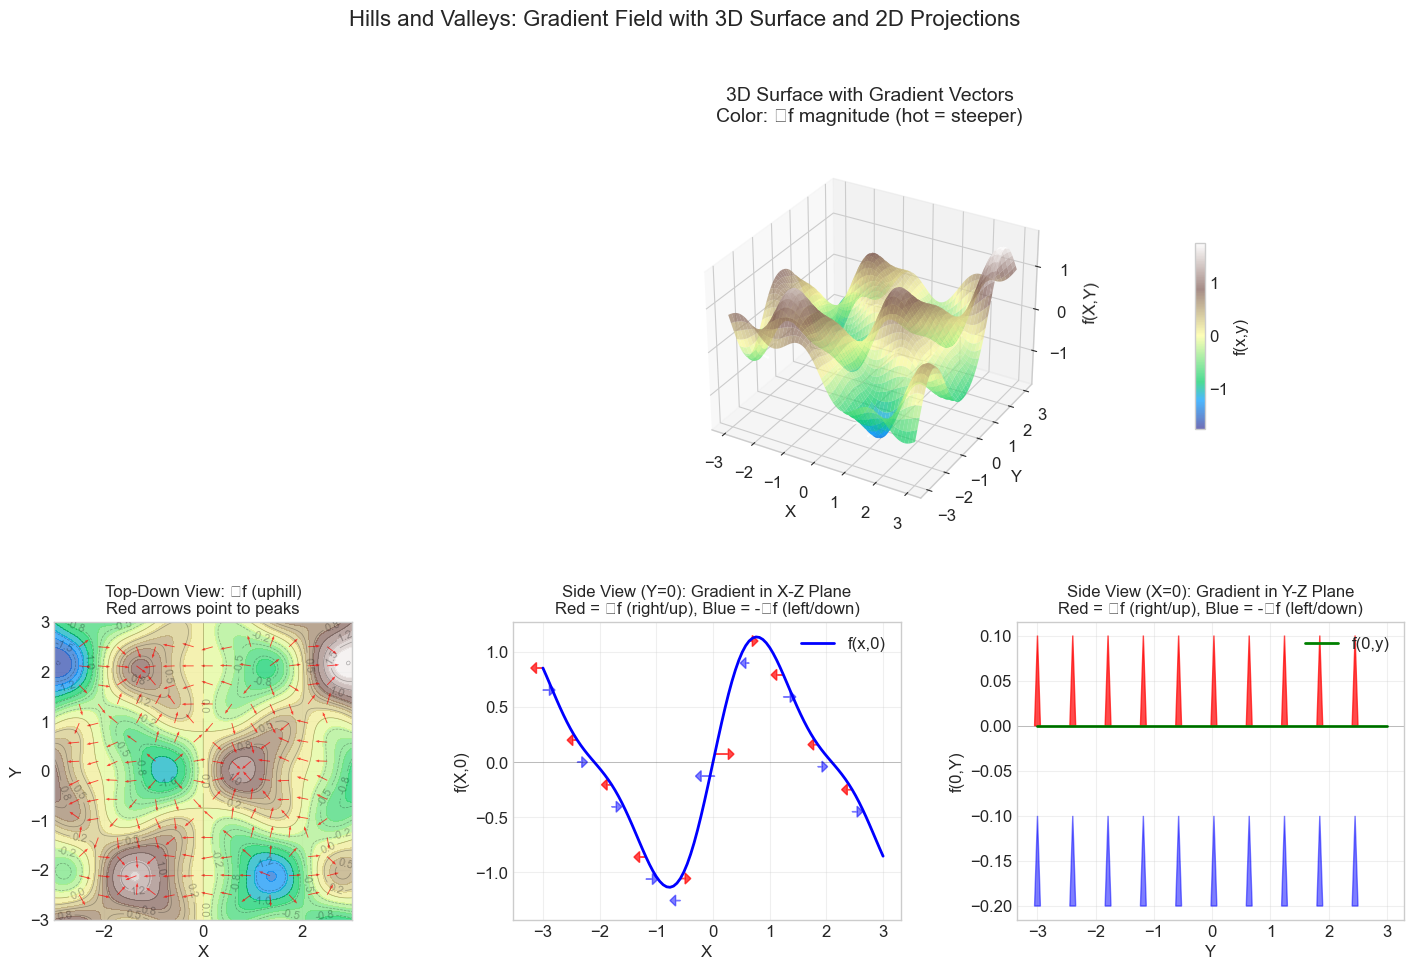


2. Volcano Crater - Radial Symmetry with Profile Analysis...


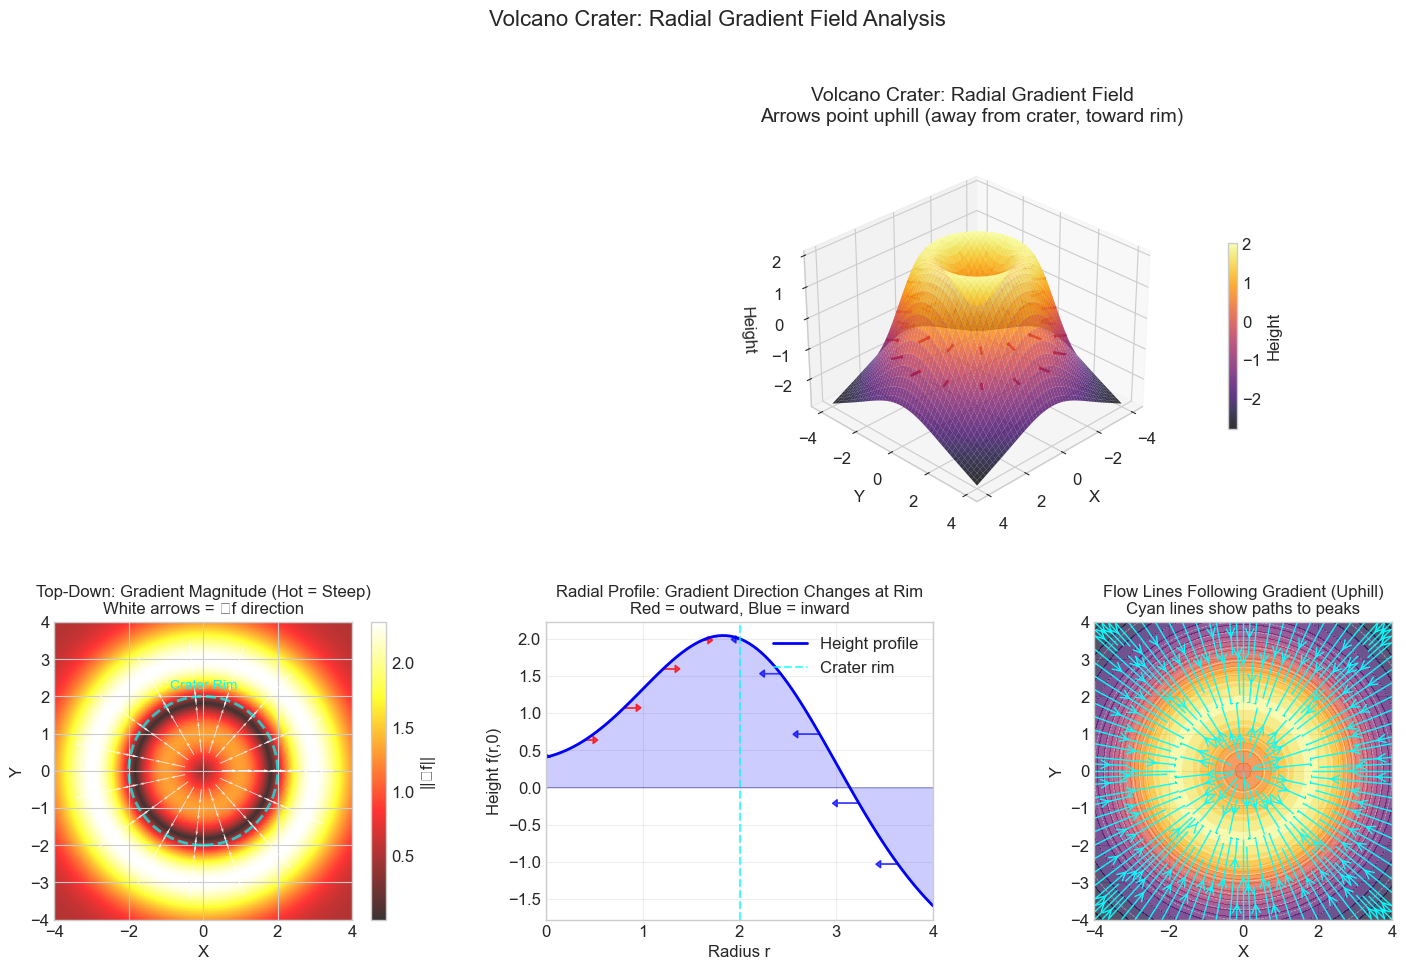


4. Wavy Terrain - Multiple Viewing Angles with Axis Projections...


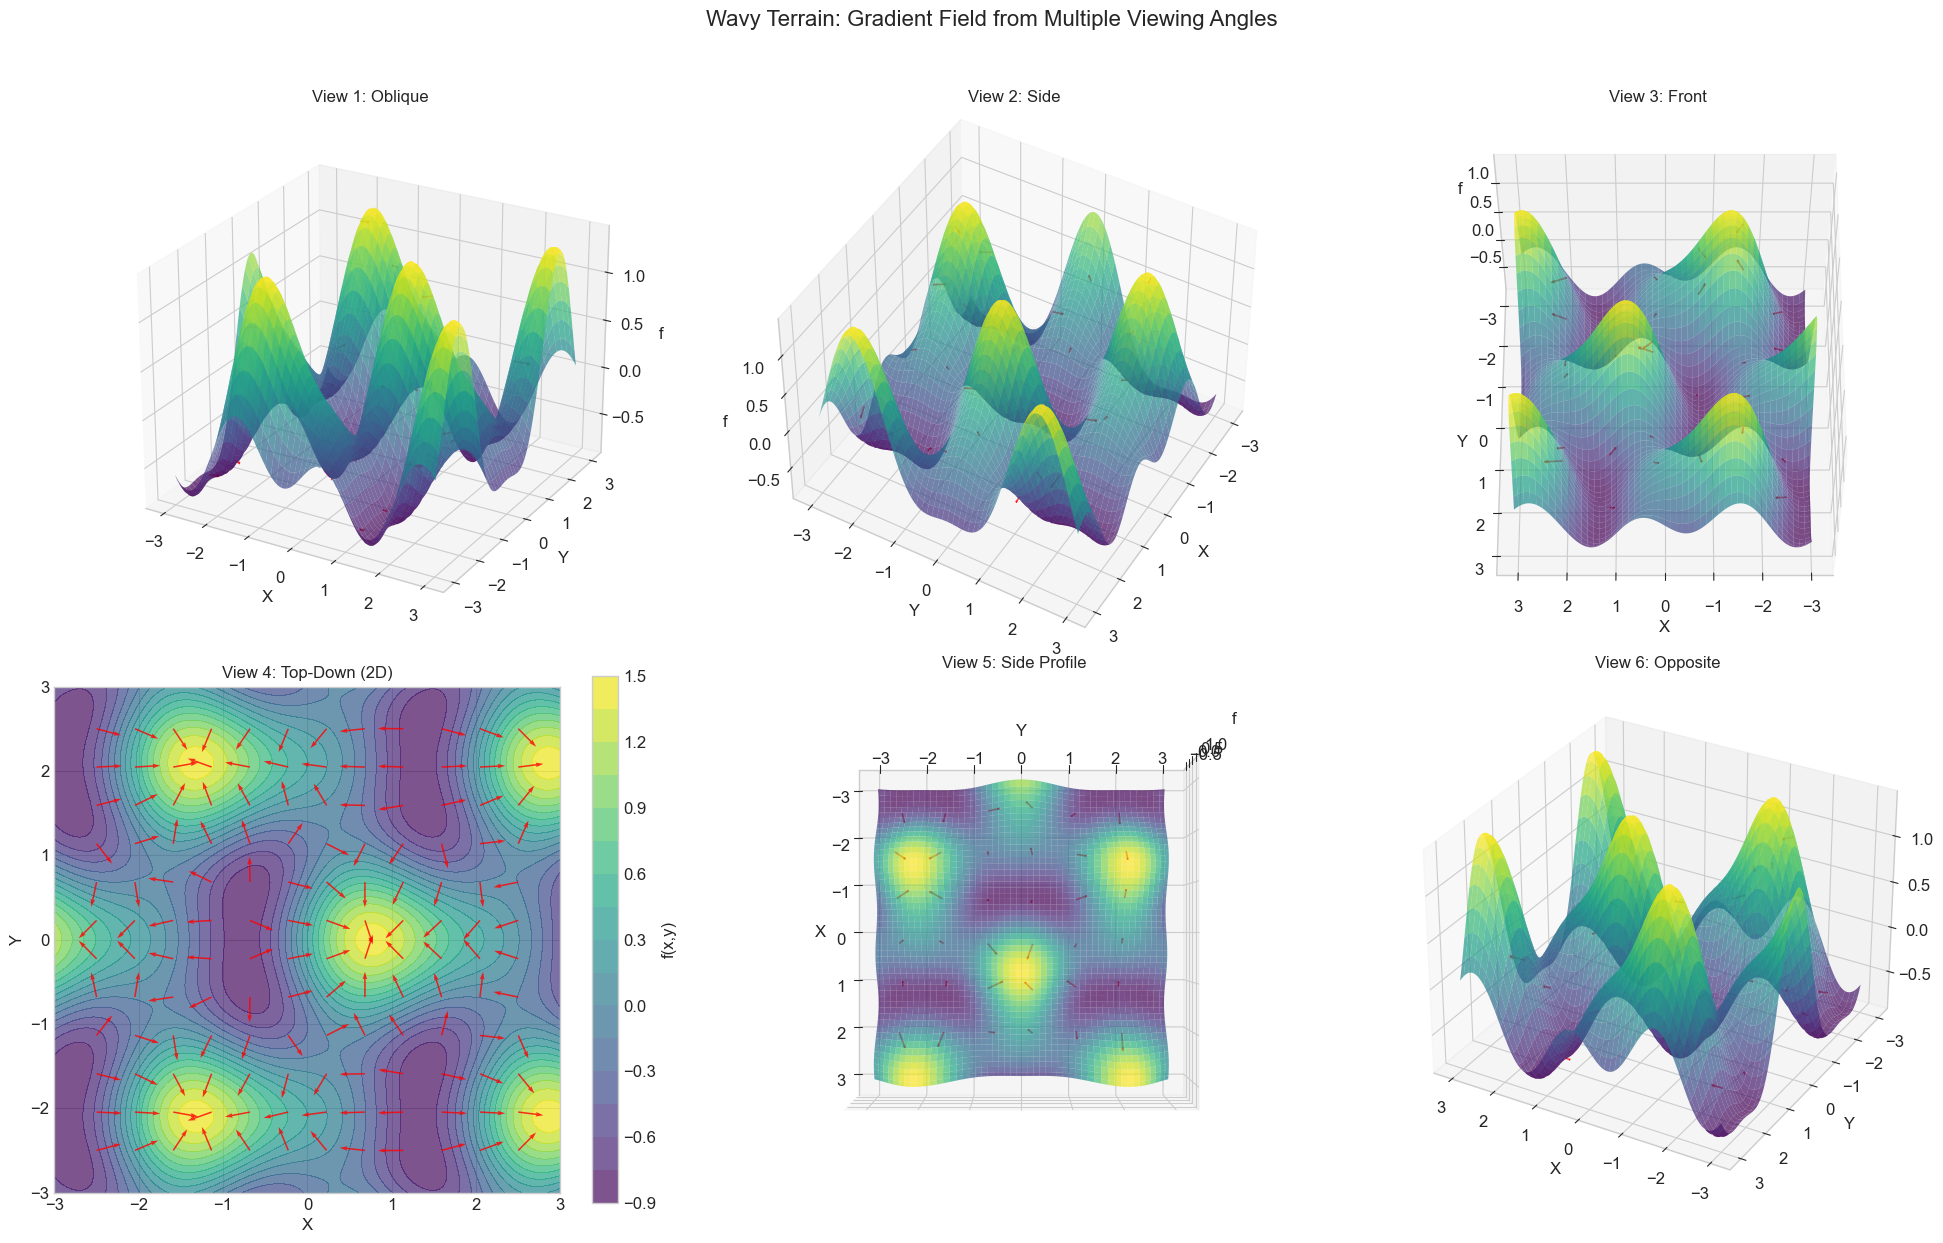

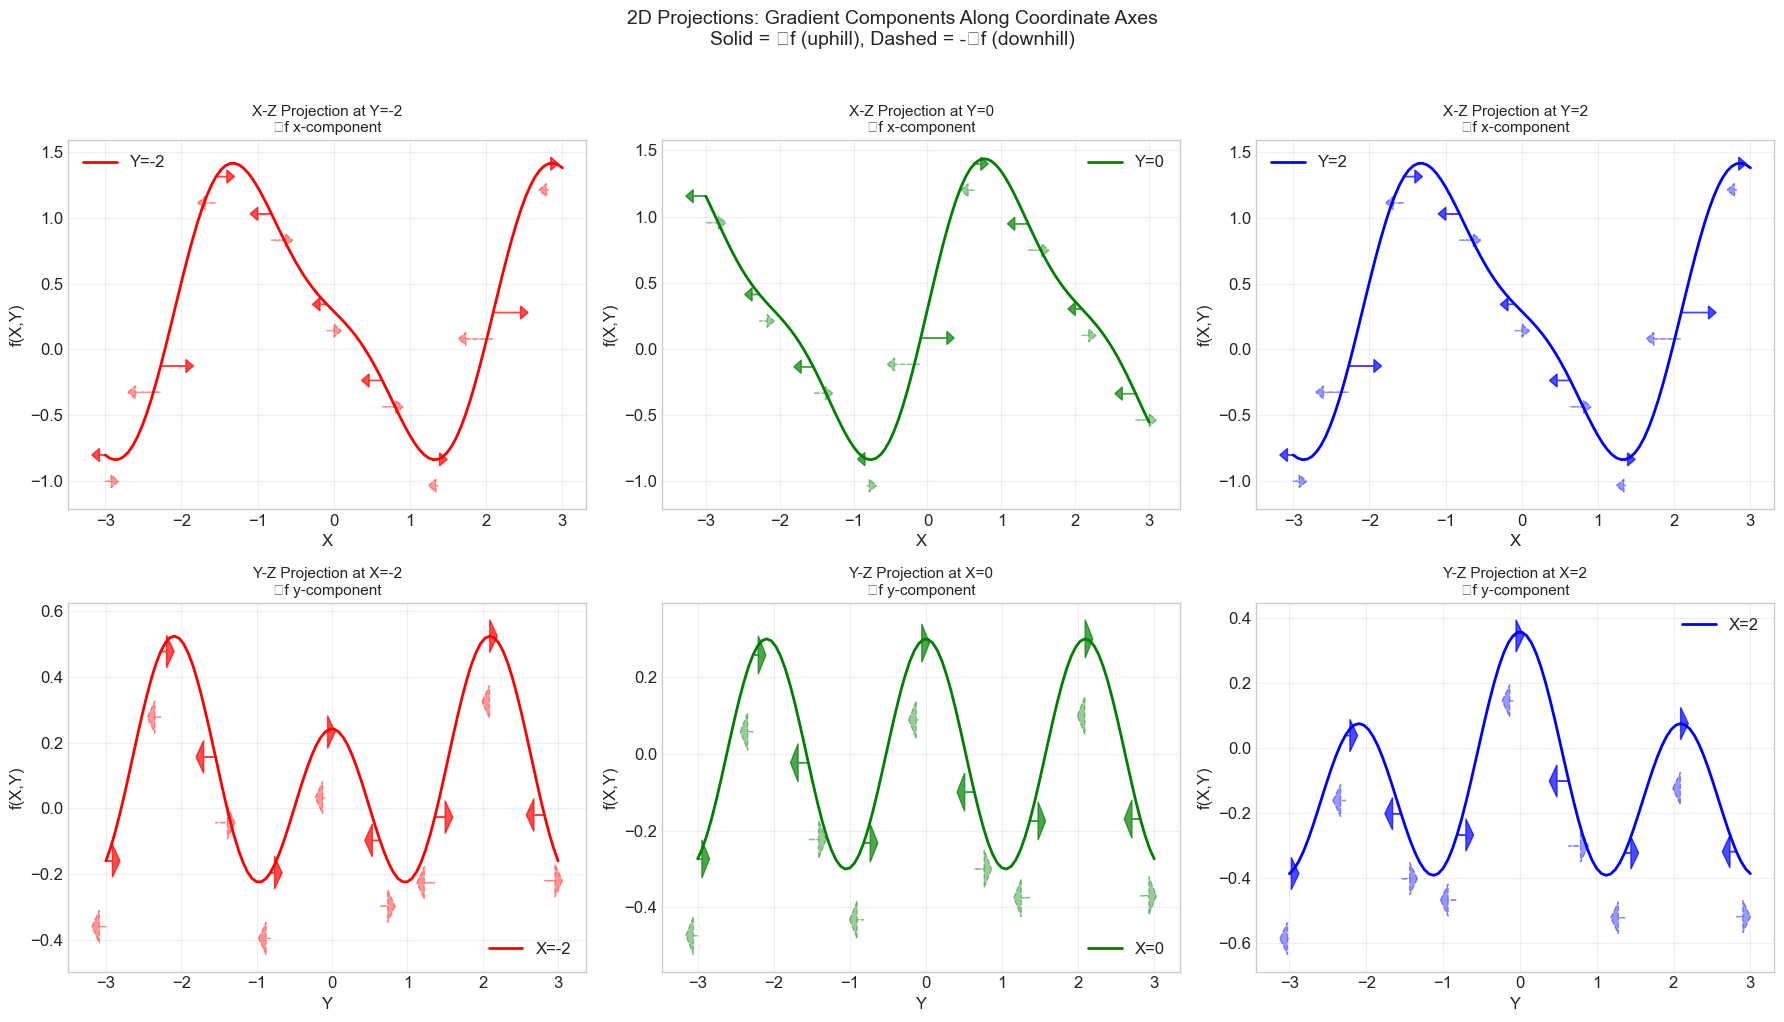


All visualizations complete!


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# ============================================================================
# EXAMPLE 1: HILLS AND VALLEYS - MULTIPLE PEAKS
# ============================================================================

def hills_and_valleys():
    """3D surface with multiple peaks and valleys showing gradient projections"""
    
    # Define function with multiple local extrema
    def f(x, y):
        return (np.sin(1.5*x) * np.cos(1.5*y) + 
                0.3 * np.sin(3*x) * np.cos(3*y) +
                0.1 * x * y)
    
    # Analytical gradient
    def grad_f(x, y):
        df_dx = (1.5 * np.cos(1.5*x) * np.cos(1.5*y) + 
                 0.9 * np.cos(3*x) * np.cos(3*y) +
                 0.1 * y)
        df_dy = (-1.5 * np.sin(1.5*x) * np.sin(1.5*y) - 
                 0.9 * np.sin(3*x) * np.sin(3*y) +
                 0.1 * x)
        return df_dx, df_dy
    
    # Create grids
    x_surf = np.linspace(-3, 3, 200)
    y_surf = np.linspace(-3, 3, 200)
    X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
    Z_surf = f(X_surf, Y_surf)
    
    # Coarse grid for gradient arrows
    x_arr = np.linspace(-2.5, 2.5, 14)
    y_arr = np.linspace(-2.5, 2.5, 14)
    X_arr, Y_arr = np.meshgrid(x_arr, y_arr)
    Z_arr = f(X_arr, Y_arr)
    U, V = grad_f(X_arr, Y_arr)
    
    # Create figure with 3D and 2D projections
    fig = plt.figure(figsize=(18, 10))
    gs = GridSpec(2, 3, figure=fig, height_ratios=[1, 0.8], hspace=0.3, wspace=0.3)
    
    # ========== 3D SURFACE WITH GRADIENT ARROWS ==========
    ax1 = fig.add_subplot(gs[0, :], projection='3d')
    
    # Plot surface
    surf = ax1.plot_surface(X_surf, Y_surf, Z_surf, 
                           cmap='terrain', alpha=0.7,
                           linewidth=0, antialiased=True)
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=20, 
                label='f(x,y)', pad=0.1)
    
    # Add gradient arrows (3D projection)
    scale = 0.2
    skip = 1
    for i in range(0, len(x_arr), skip):
        for j in range(0, len(y_arr), skip):
            # Color based on gradient magnitude
            mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
            color = plt.cm.hot(mag / mag.max())
            
            ax1.quiver(X_arr[i,j], Y_arr[i,j], Z_arr[i,j],
                      U[i,j] * scale, V[i,j] * scale, 0,
                      color=color, alpha=0.8, linewidth=1.5,
                      arrow_length_ratio=0.15)
    
    ax1.set_xlabel('X', fontsize=12)
    ax1.set_ylabel('Y', fontsize=12)
    ax1.set_zlabel('f(X,Y)', fontsize=12)
    ax1.set_title('3D Surface with Gradient Vectors\n'
                 'Color: ∇f magnitude (hot = steeper)', 
                 fontsize=14, pad=20)
    ax1.view_init(elev=30, azim=-60)
    
    # ========== TOP-DOWN PROJECTION (CONTOUR + GRADIENT) ==========
    ax2 = fig.add_subplot(gs[1, 0])
    
    # Contour plot
    contour = ax2.contourf(X_surf, Y_surf, Z_surf, levels=20, 
                          cmap='terrain', alpha=0.7)
    contour_lines = ax2.contour(X_surf, Y_surf, Z_surf, levels=15, 
                               colors='black', alpha=0.3, linewidths=0.5)
    ax2.clabel(contour_lines, inline=True, fontsize=8, fmt='%.1f')
    
    # Gradient arrows (top-down)
    U_norm = U / np.sqrt(U**2 + V**2 + 1e-8)
    V_norm = V / np.sqrt(U**2 + V**2 + 1e-8)
    ax2.quiver(X_arr, Y_arr, U_norm, V_norm, 
              color='red', alpha=0.7, scale=25, width=0.003,
              headwidth=3, headlength=4)
    
    ax2.set_xlabel('X', fontsize=12)
    ax2.set_ylabel('Y', fontsize=12)
    ax2.set_title('Top-Down View: ∇f (uphill)\nRed arrows point to peaks', 
                 fontsize=12)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.2)
    
    # ========== SIDE PROJECTION (X-Z PLANE) ==========
    ax3 = fig.add_subplot(gs[1, 1])
    
    # Sample along y=0 line
    y_fixed = 0
    x_line = np.linspace(-3, 3, 100)
    z_line = f(x_line, y_fixed)
    
    # Gradient along this line
    gx_line, gy_line = grad_f(x_line, y_fixed)
    
    ax3.plot(x_line, z_line, 'b-', linewidth=2, label='f(x,0)')
    
    # Add gradient arrows (projected onto this slice)
    for i in range(0, len(x_line), 10):
        ax3.arrow(x_line[i], z_line[i], 
                 gx_line[i] * 0.1, 0,  # Only x-component affects this slice
                 head_width=0.1, head_length=0.1,
                 fc='red', ec='red', alpha=0.7)
        
        # Add negative gradient (descent direction)
        ax3.arrow(x_line[i], z_line[i] - 0.2, 
                 -gx_line[i] * 0.1, 0,
                 head_width=0.1, head_length=0.1,
                 fc='blue', ec='blue', alpha=0.5)
    
    ax3.set_xlabel('X', fontsize=12)
    ax3.set_ylabel('f(X,0)', fontsize=12)
    ax3.set_title('Side View (Y=0): Gradient in X-Z Plane\n'
                 'Red = ∇f (right/up), Blue = -∇f (left/down)', 
                 fontsize=12)
    ax3.grid(True, alpha=0.3)
    ax3.legend(loc='upper right')
    ax3.axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
    
    # ========== SIDE PROJECTION (Y-Z PLANE) ==========
    ax4 = fig.add_subplot(gs[1, 2])
    
    # Sample along x=0 line
    x_fixed = 0
    y_line = np.linspace(-3, 3, 100)
    z_line = f(x_fixed, y_line)
    
    # Gradient along this line
    gx_line, gy_line = grad_f(x_fixed, y_line)
    
    ax4.plot(y_line, z_line, 'g-', linewidth=2, label='f(0,y)')
    
    # Add gradient arrows (projected onto this slice)
    for i in range(0, len(y_line), 10):
        ax4.arrow(y_line[i], z_line[i], 
                 gy_line[i] * 0.1, 0,
                 head_width=0.1, head_length=0.1,
                 fc='red', ec='red', alpha=0.7)
        
        # Add negative gradient
        ax4.arrow(y_line[i], z_line[i] - 0.2, 
                 -gy_line[i] * 0.1, 0,
                 head_width=0.1, head_length=0.1,
                 fc='blue', ec='blue', alpha=0.5)
    
    ax4.set_xlabel('Y', fontsize=12)
    ax4.set_ylabel('f(0,Y)', fontsize=12)
    ax4.set_title('Side View (X=0): Gradient in Y-Z Plane\n'
                 'Red = ∇f (right/up), Blue = -∇f (left/down)', 
                 fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.legend(loc='upper right')
    ax4.axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
    
    plt.suptitle('Hills and Valleys: Gradient Field with 3D Surface and 2D Projections', 
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# EXAMPLE 2: VOLCANO CRATER - RADIAL SYMMETRY
# ============================================================================

def volcano_crater():
    """3D surface of a volcano crater showing radial gradient field"""
    
    # Define volcano function: peak with crater
    def f(x, y):
        r = np.sqrt(x**2 + y**2)
        return 3 * np.exp(-(r-2)**2 / 2) - 0.5 * r
    
    # Analytical gradient (in polar coordinates for accuracy)
    def grad_f(x, y):
        r = np.sqrt(x**2 + y**2)
        if r < 1e-10:
            return 0.0, 0.0
        
        # df/dr = 3 * exp(-(r-2)²/2) * (2-r) - 0.5
        df_dr = 3 * np.exp(-(r-2)**2 / 2) * (2 - r) - 0.5
        
        # Convert to Cartesian
        df_dx = df_dr * x / r
        df_dy = df_dr * y / r
        return df_dx, df_dy
    
    # Create grids
    x_surf = np.linspace(-4, 4, 200)
    y_surf = np.linspace(-4, 4, 200)
    X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
    Z_surf = f(X_surf, Y_surf)
    
    # Coarse grid for arrows
    theta = np.linspace(0, 2*np.pi, 16)
    r = np.linspace(0.5, 3.5, 8)
    R, Theta = np.meshgrid(r, theta)
    X_arr = R * np.cos(Theta)
    Y_arr = R * np.sin(Theta)
    Z_arr = f(X_arr, Y_arr)
    
    # Compute gradients
    U = np.zeros_like(X_arr)
    V = np.zeros_like(Y_arr)
    for i in range(X_arr.shape[0]):
        for j in range(X_arr.shape[1]):
            u, v = grad_f(X_arr[i,j], Y_arr[i,j])
            U[i,j] = u
            V[i,j] = v
    
    # Create figure
    fig = plt.figure(figsize=(18, 10))
    gs = GridSpec(2, 3, figure=fig, height_ratios=[1, 0.8], hspace=0.3, wspace=0.3)
    
    # ========== 3D VOLCANO ==========
    ax1 = fig.add_subplot(gs[0, :], projection='3d')
    
    # Plot surface
    surf = ax1.plot_surface(X_surf, Y_surf, Z_surf, 
                           cmap='inferno', alpha=0.8,
                           linewidth=0, antialiased=True)
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=20, label='Height')
    
    # Add gradient arrows
    scale = 0.25
    for i in range(X_arr.shape[0]):
        for j in range(X_arr.shape[1]):
            mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
            if mag > 0.01:  # Skip near-zero gradients
                color = plt.cm.coolwarm(mag / 1.5)
                
                ax1.quiver(X_arr[i,j], Y_arr[i,j], Z_arr[i,j],
                          U[i,j] * scale, V[i,j] * scale, 0,
                          color=color, alpha=0.9, linewidth=1.8,
                          arrow_length_ratio=0.2)
    
    ax1.set_xlabel('X', fontsize=12)
    ax1.set_ylabel('Y', fontsize=12)
    ax1.set_zlabel('Height', fontsize=12)
    ax1.set_title('Volcano Crater: Radial Gradient Field\n'
                 'Arrows point uphill (away from crater, toward rim)', 
                 fontsize=14, pad=20)
    ax1.view_init(elev=30, azim=45)
    
    # ========== TOP-DOWN: GRADIENT MAGNITUDE ==========
    ax2 = fig.add_subplot(gs[1, 0])
    
    # Compute gradient magnitude on fine grid
    Z_mag = np.zeros_like(X_surf)
    for i in range(X_surf.shape[0]):
        for j in range(X_surf.shape[1]):
            u, v = grad_f(X_surf[i,j], Y_surf[i,j])
            Z_mag[i,j] = np.sqrt(u**2 + v**2)
    
    im = ax2.imshow(Z_mag, extent=[-4,4,-4,4], origin='lower', 
                   cmap='hot', alpha=0.8)
    plt.colorbar(im, ax=ax2, label='||∇f||')
    
    # Add gradient arrows (normalized)
    U_norm = U / (np.sqrt(U**2 + V**2) + 1e-8)
    V_norm = V / (np.sqrt(U**2 + V**2) + 1e-8)
    
    skip = 1
    ax2.quiver(X_arr[::skip,::skip], Y_arr[::skip,::skip],
              U_norm[::skip,::skip], V_norm[::skip,::skip],
              color='white', alpha=0.8, scale=20, width=0.003)
    
    # Mark crater rim
    circle = plt.Circle((0,0), 2, fill=False, edgecolor='cyan', 
                       linewidth=2, linestyle='--', alpha=0.7)
    ax2.add_patch(circle)
    ax2.text(0, 2.2, 'Crater Rim', color='cyan', ha='center', fontsize=10)
    
    ax2.set_xlabel('X', fontsize=12)
    ax2.set_ylabel('Y', fontsize=12)
    ax2.set_title('Top-Down: Gradient Magnitude (Hot = Steep)\n'
                 'White arrows = ∇f direction', fontsize=12)
    ax2.set_aspect('equal')
    
    # ========== RADIAL PROFILE ==========
    ax3 = fig.add_subplot(gs[1, 1])
    
    # Sample along radial line
    r_line = np.linspace(0, 4, 100)
    z_line = np.array([f(r, 0) for r in r_line])
    
    # Radial gradient
    grad_r = np.zeros_like(r_line)
    for i, r in enumerate(r_line):
        if r > 0:
            u, v = grad_f(r, 0)
            grad_r[i] = u  # df/dr at y=0
    
    ax3.plot(r_line, z_line, 'b-', linewidth=2, label='Height profile')
    ax3.fill_between(r_line, 0, z_line, alpha=0.2, color='blue')
    
    # Add gradient arrows along profile
    for i in range(0, len(r_line), 10):
        # Uphill (positive gradient = outward from center)
        if grad_r[i] > 0:
            ax3.arrow(r_line[i], z_line[i], 
                     grad_r[i] * 0.1, 0,
                     head_width=0.1, head_length=0.05,
                     fc='red', ec='red', alpha=0.7)
        else:
            # Downhill (negative gradient = toward center)
            ax3.arrow(r_line[i], z_line[i], 
                     grad_r[i] * 0.1, 0,
                     head_width=0.1, head_length=0.05,
                     fc='blue', ec='blue', alpha=0.7)
    
    ax3.axvline(x=2, color='cyan', linestyle='--', alpha=0.7, label='Crater rim')
    ax3.axhline(y=0, color='black', linewidth=0.5, alpha=0.3)
    
    ax3.set_xlabel('Radius r', fontsize=12)
    ax3.set_ylabel('Height f(r,0)', fontsize=12)
    ax3.set_title('Radial Profile: Gradient Direction Changes at Rim\n'
                 'Red = outward, Blue = inward', fontsize=12)
    ax3.grid(True, alpha=0.3)
    ax3.legend(loc='upper right')
    ax3.set_xlim(0, 4)
    
    # ========== 2D CONTOUR WITH FLOW LINES ==========
    ax4 = fig.add_subplot(gs[1, 2])
    
    # Contour plot
    contour = ax4.contourf(X_surf, Y_surf, Z_surf, levels=20, 
                          cmap='inferno', alpha=0.7)
    contour_lines = ax4.contour(X_surf, Y_surf, Z_surf, levels=15, 
                               colors='white', alpha=0.5, linewidths=0.5)
    
    # Add streamlines (follow gradient)
    y_stream, x_stream = np.mgrid[-4:4:100j, -4:4:100j]
    u_stream = np.zeros_like(x_stream)
    v_stream = np.zeros_like(y_stream)
    
    for i in range(x_stream.shape[0]):
        for j in range(x_stream.shape[1]):
            u, v = grad_f(x_stream[i,j], y_stream[i,j])
            u_stream[i,j] = u
            v_stream[i,j] = v
    
    ax4.streamplot(x_stream, y_stream, u_stream, v_stream,
                  color='cyan', linewidth=1, density=1.5,
                  arrowstyle='->', arrowsize=1.5)
    
    ax4.set_xlabel('X', fontsize=12)
    ax4.set_ylabel('Y', fontsize=12)
    ax4.set_title('Flow Lines Following Gradient (Uphill)\n'
                 'Cyan lines show paths to peaks', fontsize=12)
    ax4.set_aspect('equal')
    
    plt.suptitle('Volcano Crater: Radial Gradient Field Analysis', 
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# EXAMPLE 3: MOUNTAIN RANGE WITH RIDGES AND VALLEYS
# ============================================================================

def mountain_range():
    """3D mountain range with clear ridges and valleys"""
    
    # Define mountain range function
    def f(x, y):
        return (2 * np.exp(-((x-1)**2 + (y-1)**2)/2) +
                1.5 * np.exp(-((x+1)**2 + (y+1)**2)/1.5) +
                1.8 * np.exp(-((x-1.5)**2 + (y+1.5)**2)/2) +
                0.5 * np.sin(0.8*x) * np.cos(0.8*y) +
                0.2 * x * y)
    
    # Numerical gradient (using finite differences for complex function)
    def grad_f(x, y, h=1e-6):
        df_dx = (f(x + h, y) - f(x - h, y)) / (2*h)
        df_dy = (f(x, y + h) - f(x, y - h)) / (2*h)
        return df_dx, df_dy
    
    # Create grids
    x = np.linspace(-3, 3, 250)
    y = np.linspace(-3, 3, 250)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Arrow grid
    x_arr = np.linspace(-2.5, 2.5, 12)
    y_arr = np.linspace(-2.5, 2.5, 12)
    X_arr, Y_arr = np.meshgrid(x_arr, y_arr)
    Z_arr = np.zeros_like(X_arr)
    U = np.zeros_like(X_arr)
    V = np.zeros_like(Y_arr)
    
    for i in range(X_arr.shape[0]):
        for j in range(X_arr.shape[1]):
            Z_arr[i,j] = f(X_arr[i,j], Y_arr[i,j])
            u, v = grad_f(X_arr[i,j], Y_arr[i,j])
            U[i,j] = u
            V[i,j] = v
    
    # Create figure
    fig = plt.figure(figsize=(20, 12))
    
    # ========== MAIN 3D PLOT ==========
    ax1 = fig.add_subplot(221, projection='3d')
    
    # Plot surface
    surf = ax1.plot_surface(X, Y, Z, cmap='gist_earth', alpha=0.7,
                           linewidth=0, antialiased=True)
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=20, label='Elevation')
    
    # Add gradient arrows (colored by direction)
    scale = 0.2
    for i in range(0, X_arr.shape[0], 2):
        for j in range(0, X_arr.shape[1], 2):
            mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
            if mag > 0.05:
                # Color based on direction angle
                angle = np.arctan2(V[i,j], U[i,j])
                color = plt.cm.hsv((angle + np.pi) / (2*np.pi))
                
                ax1.quiver(X_arr[i,j], Y_arr[i,j], Z_arr[i,j],
                          U[i,j] * scale, V[i,j] * scale, 0,
                          color=color, alpha=0.9, linewidth=1.5,
                          arrow_length_ratio=0.15)
    
    ax1.set_xlabel('X', fontsize=12)
    ax1.set_ylabel('Y', fontsize=12)
    ax1.set_zlabel('Elevation', fontsize=12)
    ax1.set_title('Mountain Range: 3D Surface with Gradient Vectors\n'
                 'Color indicates gradient direction', fontsize=14)
    ax1.view_init(elev=25, azim=-45)
    
    # ========== RIDGE/VALLEY DETECTION ==========
    ax2 = fig.add_subplot(222)
    
    # Compute gradient magnitude and curvature
    Z_mag = np.zeros_like(X)
    Z_curv = np.zeros_like(X)
    
    for i in range(1, X.shape[0]-1):
        for j in range(1, X.shape[1]-1):
            u, v = grad_f(X[i,j], Y[i,j])
            Z_mag[i,j] = np.sqrt(u**2 + v**2)
            
            # Approximate curvature (Laplacian)
            Z_curv[i,j] = (Z[i+1,j] + Z[i-1,j] + Z[i,j+1] + Z[i,j-1] - 4*Z[i,j])
    
    # Ridge detection (high elevation, negative curvature)
    ridges = (Z > Z.mean() + 0.5) & (Z_curv < -0.1)
    valleys = (Z < Z.mean() - 0.5) & (Z_curv > 0.1)
    
    ax2.imshow(Z, extent=[-3,3,-3,3], origin='lower', cmap='gist_earth', alpha=0.7)
    
    # Mark ridges and valleys
    ridge_y, ridge_x = np.where(ridges)
    valley_y, valley_x = np.where(valleys)
    
    ax2.scatter(X[ridge_y, ridge_x], Y[ridge_y, ridge_x], 
               color='red', s=5, alpha=0.5, label='Ridges')
    ax2.scatter(X[valley_y, valley_x], Y[valley_y, valley_x], 
               color='blue', s=5, alpha=0.5, label='Valleys')
    
    # Add gradient vectors
    ax2.quiver(X_arr, Y_arr, U, V, color='white', alpha=0.6, 
              scale=30, width=0.002, headwidth=3)
    
    ax2.set_xlabel('X', fontsize=12)
    ax2.set_ylabel('Y', fontsize=12)
    ax2.set_title('Ridge and Valley Detection\n'
                 'Red = Ridges (gradients diverge), Blue = Valleys (gradients converge)', 
                 fontsize=12)
    ax2.legend(loc='upper right')
    ax2.set_aspect('equal')
    
    # ========== 3D WIREFRAME WITH GRADIENT PROJECTIONS ==========
    ax3 = fig.add_subplot(223, projection='3d')
    
    # Plot wireframe
    ax3.plot_wireframe(X[::5,::5], Y[::5,::5], Z[::5,::5], 
                      color='gray', alpha=0.3, linewidth=0.5)
    
    # Plot gradient vectors on the surface
    for i in range(0, X_arr.shape[0], 1):
        for j in range(0, X_arr.shape[1], 1):
            mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
            if mag > 0.1:
                ax3.quiver(X_arr[i,j], Y_arr[i,j], Z_arr[i,j],
                          U[i,j] * 0.15, V[i,j] * 0.15, 0,
                          color='red', alpha=0.7, linewidth=1.2,
                          arrow_length_ratio=0.2)
    
    # Project gradients to ground
    for i in range(0, X_arr.shape[0], 2):
        for j in range(0, X_arr.shape[1], 2):
            mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
            if mag > 0.1:
                ax3.quiver(X_arr[i,j], Y_arr[i,j], -1.5,
                          U[i,j] * 0.15, V[i,j] * 0.15, 0,
                          color='blue', alpha=0.4, linewidth=1,
                          arrow_length_ratio=0.15)
    
    ax3.set_xlabel('X', fontsize=12)
    ax3.set_ylabel('Y', fontsize=12)
    ax3.set_zlabel('Elevation', fontsize=12)
    ax3.set_title('3D Wireframe with Gradient Projections\n'
                 'Red = on surface, Blue = projected to base', 
                 fontsize=12)
    ax3.view_init(elev=20, azim=30)
    ax3.set_zlim(-1.5, 2.5)
    
    # ========== GRADIENT CONVERGENCE/DIVERGENCE ==========
    ax4 = fig.add_subplot(224)
    
    # Compute divergence of gradient field (Laplacian)
    div_grad = Z_curv  # Laplacian approximates divergence of gradient
    
    im = ax4.imshow(div_grad, extent=[-3,3,-3,3], origin='lower', 
                   cmap='RdBu_r', vmin=-0.5, vmax=0.5, alpha=0.8)
    plt.colorbar(im, ax=ax4, label='∇·∇f (divergence of gradient)')
    
    # Add streamlines to show flow
    x_stream, y_stream = np.mgrid[-3:3:50j, -3:3:50j]
    u_stream = np.zeros_like(x_stream)
    v_stream = np.zeros_like(y_stream)
    
    for i in range(x_stream.shape[0]):
        for j in range(x_stream.shape[1]):
            u, v = grad_f(x_stream[i,j], y_stream[i,j])
            u_stream[i,j] = u
            v_stream[i,j] = v
    
    ax4.streamplot(x_stream, y_stream, u_stream, v_stream,
                  color='black', linewidth=0.8, density=1.2,
                  arrowstyle='->', arrowsize=1)
    
    ax4.set_xlabel('X', fontsize=12)
    ax4.set_ylabel('Y', fontsize=12)
    ax4.set_title('Gradient Field Divergence\n'
                 'Red = divergence (peaks), Blue = convergence (valleys)', 
                 fontsize=12)
    ax4.set_aspect('equal')
    
    plt.suptitle('Mountain Range: Comprehensive Gradient Analysis\n'
                'Ridges (red) show divergent gradients, Valleys (blue) show convergent gradients', 
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# EXAMPLE 4: WAVY TERRAIN WITH GRADIENT ANIMATION FRAMES
# ============================================================================

def wavy_terrain_projections():
    """Wavy terrain with multiple viewing projections"""
    
    # Define wavy function
    def f(x, y):
        return np.sin(1.5*x) * np.cos(1.5*y) + 0.3 * np.sin(3*x) + 0.3 * np.cos(3*y)
    
    def grad_f(x, y):
        df_dx = 1.5 * np.cos(1.5*x) * np.cos(1.5*y) + 0.9 * np.cos(3*x)
        df_dy = -1.5 * np.sin(1.5*x) * np.sin(1.5*y) - 0.9 * np.sin(3*y)
        return df_dx, df_dy
    
    # Create grids
    x = np.linspace(-3, 3, 200)
    y = np.linspace(-3, 3, 200)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Arrow grid
    x_arr = np.linspace(-2.5, 2.5, 12)
    y_arr = np.linspace(-2.5, 2.5, 12)
    X_arr, Y_arr = np.meshgrid(x_arr, y_arr)
    Z_arr = f(X_arr, Y_arr)
    U, V = grad_f(X_arr, Y_arr)
    
    # Create figure with multiple viewing angles
    fig = plt.figure(figsize=(20, 12))
    
    viewing_angles = [
        (25, -60, 'View 1: Oblique'),
        (45, 30, 'View 2: Side'),
        (60, 90, 'View 3: Front'),
        (0, 0, 'View 4: Top-Down (2D)'),
        (90, 0, 'View 5: Side Profile'),
        (30, 120, 'View 6: Opposite')
    ]
    
    for idx, (elev, azim, title) in enumerate(viewing_angles, 1):
        if idx <= 6:
            if idx == 4:  # Top-down 2D view
                ax = fig.add_subplot(2, 3, idx)
                
                # Contour plot
                contour = ax.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
                plt.colorbar(contour, ax=ax, label='f(x,y)')
                
                # Gradient arrows
                U_norm = U / np.sqrt(U**2 + V**2 + 1e-8)
                V_norm = V / np.sqrt(U**2 + V**2 + 1e-8)
                ax.quiver(X_arr, Y_arr, U_norm, V_norm, 
                         color='red', alpha=0.8, scale=20, width=0.003)
                
                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_title(title, fontsize=12)
                ax.set_aspect('equal')
                
            else:  # 3D views
                ax = fig.add_subplot(2, 3, idx, projection='3d')
                
                # Plot surface
                surf = ax.plot_surface(X, Y, Z, cmap='viridis', 
                                      alpha=0.7, linewidth=0, antialiased=True)
                
                # Add gradient arrows
                scale = 0.15
                for i in range(0, X_arr.shape[0], 2):
                    for j in range(0, X_arr.shape[1], 2):
                        mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
                        if mag > 0.01:
                            ax.quiver(X_arr[i,j], Y_arr[i,j], Z_arr[i,j],
                                     U[i,j] * scale, V[i,j] * scale, 0,
                                     color='red', alpha=0.7, linewidth=1.2,
                                     arrow_length_ratio=0.2)
                
                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_zlabel('f')
                ax.set_title(title, fontsize=12)
                ax.view_init(elev=elev, azim=azim)
    
    plt.suptitle('Wavy Terrain: Gradient Field from Multiple Viewing Angles', 
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Additional figure: 2D projections along axes
    fig2, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # X-Z projections at different Y values
    y_values = [-2, 0, 2]
    colors = ['red', 'green', 'blue']
    
    for idx, (y_val, color) in enumerate(zip(y_values, colors)):
        ax = axes[0, idx]
        
        x_line = np.linspace(-3, 3, 100)
        z_line = f(x_line, y_val)
        gx_line, gy_line = grad_f(x_line, y_val)
        
        ax.plot(x_line, z_line, color=color, linewidth=2, label=f'Y={y_val}')
        
        # Add gradient arrows
        for i in range(0, len(x_line), 12):
            ax.arrow(x_line[i], z_line[i], 
                    gx_line[i] * 0.15, 0,
                    head_width=0.1, head_length=0.1,
                    fc=color, ec=color, alpha=0.7)
            
            ax.arrow(x_line[i], z_line[i] - 0.2, 
                    -gx_line[i] * 0.15, 0,
                    head_width=0.1, head_length=0.1,
                    fc=color, ec=color, alpha=0.4, linestyle='--')
        
        ax.set_xlabel('X')
        ax.set_ylabel('f(X,Y)')
        ax.set_title(f'X-Z Projection at Y={y_val}\n∇f x-component', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    # Y-Z projections at different X values
    x_values = [-2, 0, 2]
    
    for idx, (x_val, color) in enumerate(zip(x_values, colors)):
        ax = axes[1, idx]
        
        y_line = np.linspace(-3, 3, 100)
        z_line = f(x_val, y_line)
        gx_line, gy_line = grad_f(x_val, y_line)
        
        ax.plot(y_line, z_line, color=color, linewidth=2, label=f'X={x_val}')
        
        # Add gradient arrows
        for i in range(0, len(y_line), 12):
            ax.arrow(y_line[i], z_line[i], 
                    gy_line[i] * 0.15, 0,
                    head_width=0.1, head_length=0.1,
                    fc=color, ec=color, alpha=0.7)
            
            ax.arrow(y_line[i], z_line[i] - 0.2, 
                    -gy_line[i] * 0.15, 0,
                    head_width=0.1, head_length=0.1,
                    fc=color, ec=color, alpha=0.4, linestyle='--')
        
        ax.set_xlabel('Y')
        ax.set_ylabel('f(X,Y)')
        ax.set_title(f'Y-Z Projection at X={x_val}\n∇f y-component', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    plt.suptitle('2D Projections: Gradient Components Along Coordinate Axes\n'
                'Solid = ∇f (uphill), Dashed = -∇f (downhill)', 
                fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig2

# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("=" * 80)
    print("3D SURFACE GRADIENT VISUALIZATION WITH PROJECTIONS")
    print("=" * 80)
    
    print("\n1. Hills and Valleys - Multiple Peaks with Side Projections...")
    hills_and_valleys()
    
    print("\n2. Volcano Crater - Radial Symmetry with Profile Analysis...")
    volcano_crater()
    
    
    print("\n4. Wavy Terrain - Multiple Viewing Angles with Axis Projections...")
    wavy_terrain_projections()
    
    print("\n" + "=" * 80)
    print("All visualizations complete!")
    print("=" * 80)

3D SURFACE GRADIENT VISUALIZATION WITH PROJECTIONS

3. Mountain Range - Ridge/Valley Detection with Gradient Divergence...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


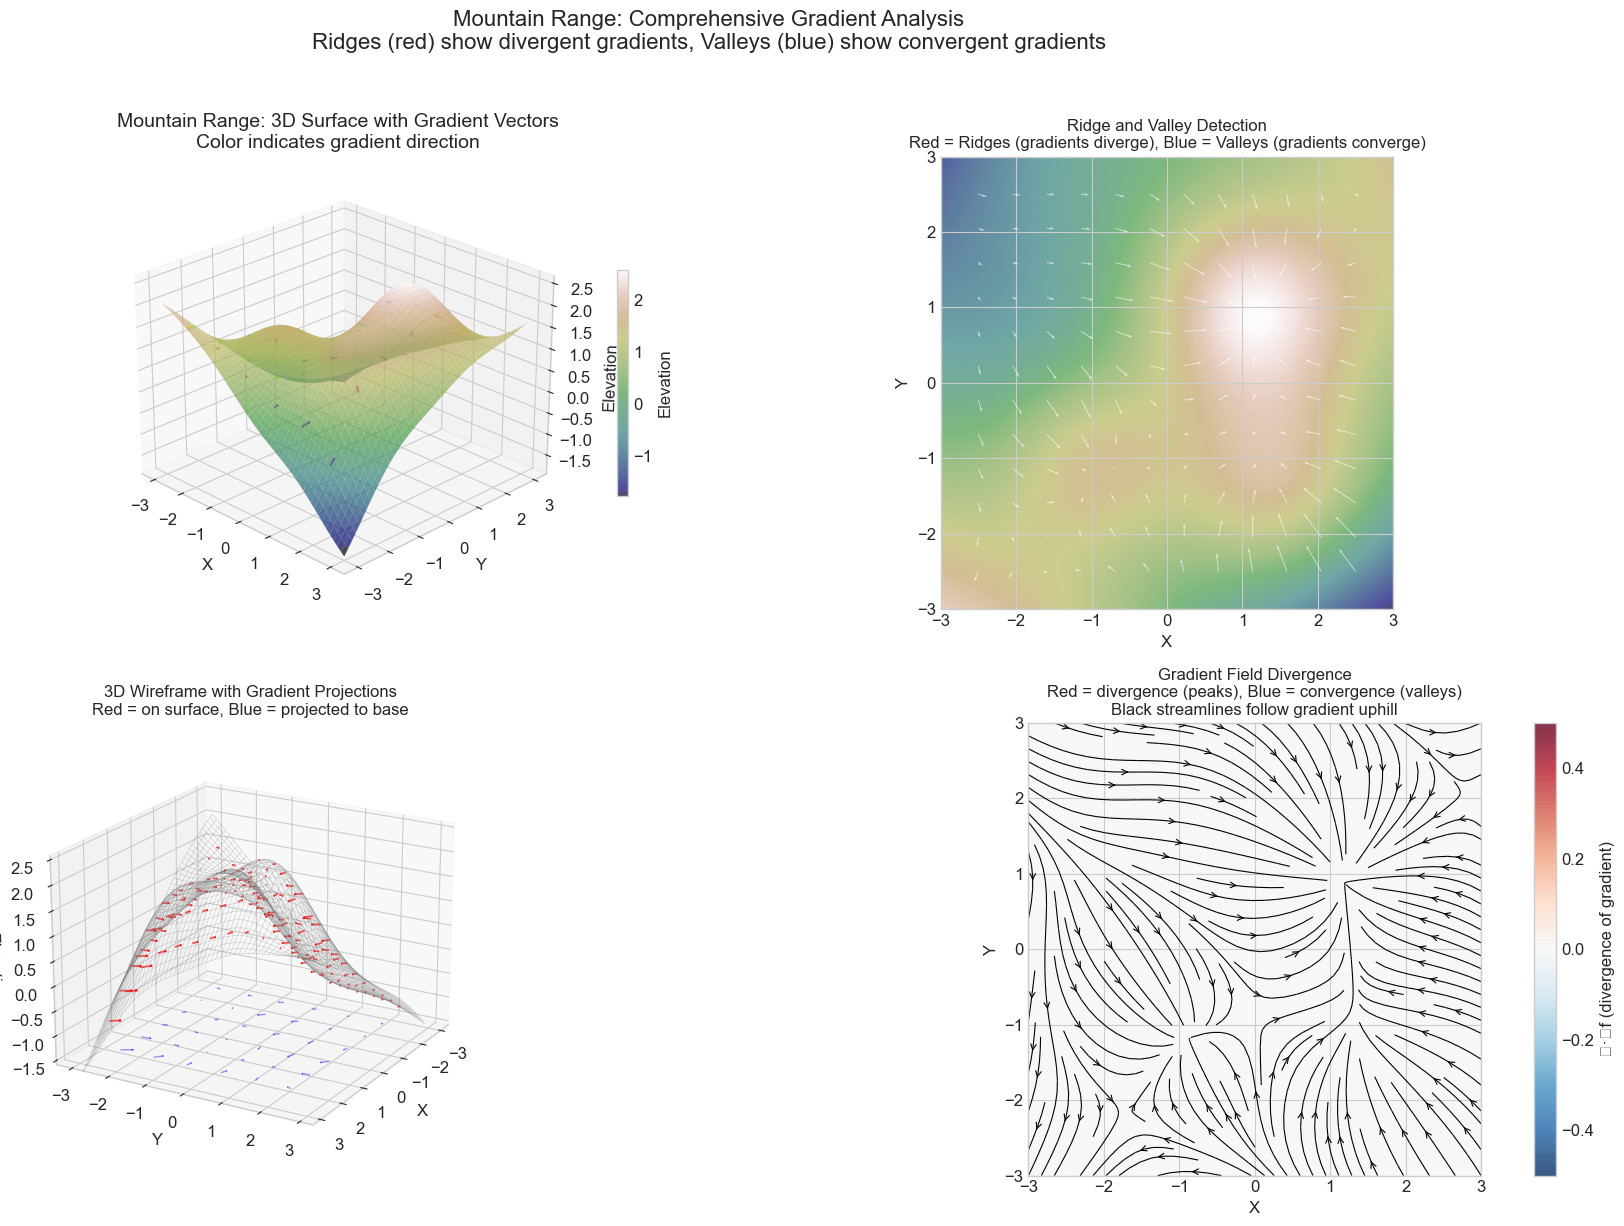


Visualization complete!


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# ============================================================================
# EXAMPLE 3: MOUNTAIN RANGE WITH RIDGES AND VALLEYS (CORRECTED)
# ============================================================================

def mountain_range():
    """3D mountain range with clear ridges and valleys - CORRECTED streamplot"""
    
    # Define mountain range function
    def f(x, y):
        return (2 * np.exp(-((x-1)**2 + (y-1)**2)/2) +
                1.5 * np.exp(-((x+1)**2 + (y+1)**2)/1.5) +
                1.8 * np.exp(-((x-1.5)**2 + (y+1.5)**2)/2) +
                0.5 * np.sin(0.8*x) * np.cos(0.8*y) +
                0.2 * x * y)
    
    # Numerical gradient (using finite differences for complex function)
    def grad_f(x, y, h=1e-6):
        df_dx = (f(x + h, y) - f(x - h, y)) / (2*h)
        df_dy = (f(x, y + h) - f(x, y - h)) / (2*h)
        return df_dx, df_dy
    
    # Create grids
    x = np.linspace(-3, 3, 250)
    y = np.linspace(-3, 3, 250)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Arrow grid
    x_arr = np.linspace(-2.5, 2.5, 12)
    y_arr = np.linspace(-2.5, 2.5, 12)
    X_arr, Y_arr = np.meshgrid(x_arr, y_arr)
    Z_arr = np.zeros_like(X_arr)
    U = np.zeros_like(X_arr)
    V = np.zeros_like(Y_arr)
    
    for i in range(X_arr.shape[0]):
        for j in range(X_arr.shape[1]):
            Z_arr[i,j] = f(X_arr[i,j], Y_arr[i,j])
            u, v = grad_f(X_arr[i,j], Y_arr[i,j])
            U[i,j] = u
            V[i,j] = v
    
    # Create figure
    fig = plt.figure(figsize=(20, 12))
    
    # ========== MAIN 3D PLOT ==========
    ax1 = fig.add_subplot(221, projection='3d')
    
    # Plot surface
    surf = ax1.plot_surface(X, Y, Z, cmap='gist_earth', alpha=0.7,
                           linewidth=0, antialiased=True)
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=20, label='Elevation')
    
    # Add gradient arrows (colored by direction)
    scale = 0.2
    for i in range(0, X_arr.shape[0], 2):
        for j in range(0, X_arr.shape[1], 2):
            mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
            if mag > 0.05:
                # Color based on direction angle
                angle = np.arctan2(V[i,j], U[i,j])
                color = plt.cm.hsv((angle + np.pi) / (2*np.pi))
                
                ax1.quiver(X_arr[i,j], Y_arr[i,j], Z_arr[i,j],
                          U[i,j] * scale, V[i,j] * scale, 0,
                          color=color, alpha=0.9, linewidth=1.5,
                          arrow_length_ratio=0.15)
    
    ax1.set_xlabel('X', fontsize=12)
    ax1.set_ylabel('Y', fontsize=12)
    ax1.set_zlabel('Elevation', fontsize=12)
    ax1.set_title('Mountain Range: 3D Surface with Gradient Vectors\n'
                 'Color indicates gradient direction', fontsize=14)
    ax1.view_init(elev=25, azim=-45)
    
    # ========== RIDGE/VALLEY DETECTION ==========
    ax2 = fig.add_subplot(222)
    
    # Compute gradient magnitude and curvature
    Z_mag = np.zeros_like(X)
    Z_curv = np.zeros_like(X)
    
    for i in range(1, X.shape[0]-1):
        for j in range(1, X.shape[1]-1):
            u, v = grad_f(X[i,j], Y[i,j])
            Z_mag[i,j] = np.sqrt(u**2 + v**2)
            
            # Approximate curvature (Laplacian)
            Z_curv[i,j] = (Z[i+1,j] + Z[i-1,j] + Z[i,j+1] + Z[i,j-1] - 4*Z[i,j])
    
    # Ridge detection (high elevation, negative curvature)
    ridges = (Z > Z.mean() + 0.5) & (Z_curv < -0.1)
    valleys = (Z < Z.mean() - 0.5) & (Z_curv > 0.1)
    
    ax2.imshow(Z, extent=[-3,3,-3,3], origin='lower', cmap='gist_earth', alpha=0.7)
    
    # Mark ridges and valleys
    ridge_y, ridge_x = np.where(ridges)
    valley_y, valley_x = np.where(valleys)
    
    # Convert indices to coordinates
    if len(ridge_x) > 0:
        ridge_coords_x = X[ridge_y, ridge_x]
        ridge_coords_y = Y[ridge_y, ridge_x]
        ax2.scatter(ridge_coords_x, ridge_coords_y, 
                   color='red', s=5, alpha=0.5, label='Ridges')
    
    if len(valley_x) > 0:
        valley_coords_x = X[valley_y, valley_x]
        valley_coords_y = Y[valley_y, valley_x]
        ax2.scatter(valley_coords_x, valley_coords_y, 
                   color='blue', s=5, alpha=0.5, label='Valleys')
    
    # Add gradient vectors
    ax2.quiver(X_arr, Y_arr, U, V, color='white', alpha=0.6, 
              scale=30, width=0.002, headwidth=3)
    
    ax2.set_xlabel('X', fontsize=12)
    ax2.set_ylabel('Y', fontsize=12)
    ax2.set_title('Ridge and Valley Detection\n'
                 'Red = Ridges (gradients diverge), Blue = Valleys (gradients converge)', 
                 fontsize=12)
    ax2.legend(loc='upper right')
    ax2.set_aspect('equal')
    
    # ========== 3D WIREFRAME WITH GRADIENT PROJECTIONS ==========
    ax3 = fig.add_subplot(223, projection='3d')
    
    # Plot wireframe
    ax3.plot_wireframe(X[::5,::5], Y[::5,::5], Z[::5,::5], 
                      color='gray', alpha=0.3, linewidth=0.5)
    
    # Plot gradient vectors on the surface
    for i in range(0, X_arr.shape[0], 1):
        for j in range(0, X_arr.shape[1], 1):
            mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
            if mag > 0.1:
                ax3.quiver(X_arr[i,j], Y_arr[i,j], Z_arr[i,j],
                          U[i,j] * 0.15, V[i,j] * 0.15, 0,
                          color='red', alpha=0.7, linewidth=1.2,
                          arrow_length_ratio=0.2)
    
    # Project gradients to ground
    for i in range(0, X_arr.shape[0], 2):
        for j in range(0, X_arr.shape[1], 2):
            mag = np.sqrt(U[i,j]**2 + V[i,j]**2)
            if mag > 0.1:
                ax3.quiver(X_arr[i,j], Y_arr[i,j], -1.5,
                          U[i,j] * 0.15, V[i,j] * 0.15, 0,
                          color='blue', alpha=0.4, linewidth=1,
                          arrow_length_ratio=0.15)
    
    ax3.set_xlabel('X', fontsize=12)
    ax3.set_ylabel('Y', fontsize=12)
    ax3.set_zlabel('Elevation', fontsize=12)
    ax3.set_title('3D Wireframe with Gradient Projections\n'
                 'Red = on surface, Blue = projected to base', 
                 fontsize=12)
    ax3.view_init(elev=20, azim=30)
    ax3.set_zlim(-1.5, 2.5)
    
    # ========== GRADIENT CONVERGENCE/DIVERGENCE ==========
    ax4 = fig.add_subplot(224)
    
    # Compute divergence of gradient field (Laplacian)
    div_grad = Z_curv  # Laplacian approximates divergence of gradient
    
    im = ax4.imshow(div_grad, extent=[-3,3,-3,3], origin='lower', 
                   cmap='RdBu_r', vmin=-0.5, vmax=0.5, alpha=0.8)
    plt.colorbar(im, ax=ax4, label='∇·∇f (divergence of gradient)')
    
    # ============ CORRECTED STREAMPLOT ============
    # Create 1D coordinate arrays for streamplot
    x_stream = np.linspace(-3, 3, 50)
    y_stream = np.linspace(-3, 3, 50)
    
    # Create 2D meshgrid for gradient computation
    X_stream, Y_stream = np.meshgrid(x_stream, y_stream)
    
    # Compute gradient on this grid
    U_stream = np.zeros_like(X_stream)
    V_stream = np.zeros_like(Y_stream)
    
    for i in range(X_stream.shape[0]):
        for j in range(X_stream.shape[1]):
            u, v = grad_f(X_stream[i,j], Y_stream[i,j])
            U_stream[i,j] = u
            V_stream[i,j] = v
    
    # Now use 1D x_stream, y_stream with 2D U_stream, V_stream
    ax4.streamplot(x_stream, y_stream, U_stream, V_stream,
                  color='black', linewidth=0.8, density=1.2,
                  arrowstyle='->', arrowsize=1)
    
    ax4.set_xlabel('X', fontsize=12)
    ax4.set_ylabel('Y', fontsize=12)
    ax4.set_title('Gradient Field Divergence\n'
                 'Red = divergence (peaks), Blue = convergence (valleys)\n'
                 'Black streamlines follow gradient uphill', 
                 fontsize=12)
    ax4.set_aspect('equal')
    
    plt.suptitle('Mountain Range: Comprehensive Gradient Analysis\n'
                'Ridges (red) show divergent gradients, Valleys (blue) show convergent gradients', 
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return fig

# ============================================================================
# EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("=" * 80)
    print("3D SURFACE GRADIENT VISUALIZATION WITH PROJECTIONS")
    print("=" * 80)
    
    print("\n3. Mountain Range - Ridge/Valley Detection with Gradient Divergence...")
    mountain_range()
    
    print("\n" + "=" * 80)
    print("Visualization complete!")
    print("=" * 80)